# How Couples Meet

## Setup and Initialization

### Import libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import log_loss, accuracy_score

### Import Dataset

In [140]:
df = pd.read_excel("HCMST_2009_Data_ver_3.04.xlsx")
df.head()


/anaconda/envs/azureml_py38/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Variable,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,...,w3_mbtiming_year,w3_mbtiming_month,w3_q5,w3_q6,w3_q7,w3_q8,w3_q9,w3_q10,w3_nonmbtiming_year,w3_nonmbtiming_month
0,Label,unique case ID,Main Weight for all respondents,Main Weight for Partnered Respondents,respondent age at time of HCMST wave I survey,age - 7 categories,age - 4 categories,education (highest degree received),education (categorical),race / ethnicity,...,[Year:] When did you get [divorced/separated] ...,[Month:] When did you get [divorced/separated]...,Are you still in a romantic relationship with ...,Are you currently living with [xNameP]?,"In the past [year/two years], have you and [xN...","In the past [year/two years], have you and [xN...",How did your relationship with [xNameP] end?,"Between you and [xNameP], who wanted more to b...",[Year:] When did you break-up with [xNameP]?,[Month:] When did you break-up with [xNameP]?
1,NaN,22526,4265,4265,52,4,3,12,4,4,...,0,0,1,1,2,1,0,0,0,0
2,NaN,23286,16485,16485,28,2,1,13,4,1,...,0,0,0,0,0,0,0,0,0,0
3,NaN,25495,52464,0,49,4,3,9,2,2,...,0,0,0,0,0,0,0,0,0,0
4,NaN,26315,4575,4575,31,2,2,11,3,1,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df = df.drop(index = 0).drop(columns = df.columns[0])
df.head()

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,...,w3_mbtiming_year,w3_mbtiming_month,w3_q5,w3_q6,w3_q7,w3_q8,w3_q9,w3_q10,w3_nonmbtiming_year,w3_nonmbtiming_month
1,22526,4265,4265,52,4,3,12,4,4,2,...,0,0,1,1,2,1,0,0,0,0
2,23286,16485,16485,28,2,1,13,4,1,2,...,0,0,0,0,0,0,0,0,0,0
3,25495,52464,0,49,4,3,9,2,2,2,...,0,0,0,0,0,0,0,0,0,0
4,26315,4575,4575,31,2,2,11,3,1,1,...,0,0,0,0,0,0,0,0,0,0
5,27355,12147,0,35,3,2,9,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4002 entries, 1 to 4002
Columns: 387 entries, caseid_new to w3_nonmbtiming_month
dtypes: object(387)
memory usage: 11.8+ MB


**Inferences:**

The dataset consists of **4002 entries** and **387 columns**.
We can also see that the data is in **object** format so it will be necessary to **convert** it to the correct **data types**

Given the extensive number of **columns** we have decided to **retain only the essential ones for our study**. 

So in the next step we will proceed with cleaning the data. 

In [143]:
columns_to_keep = [
    'caseid_new', 'weight1', 'weight2', 'ppage', 'ppeduc', 'ppgender', 'pphhhead', 
    'pphouseholdsize', 'pphouse', 'ppincimp', 'ppmarit', 'ppmsacat', 'pprent', 
    'ppt18ov', 'children_in_hh', 'ppwork', 'pphispan', 'pprace_white', 'pprace_black', 
    'pprace_nativeamerican', 'pprace_asianindian', 'pprace_chinese', 'pprace_filipino', 
    'pprace_japanese', 'pprace_korean', 'pprace_vietnamese', 'pprace_otherasian', 
    'pprace_hawaiian', 'pprace_guamanian', 'pprace_samoan', 'pprace_otherpacificislander', 
    'pprace_someotherrace', 'pppartyid3', 'papreligion', 'ppppcmdate_yrmo', 'pppadate_yrmo', 
    'HCMST_main_interview_yrmo', 'qflag', 'glbstatus', 's1', 's1a', 's2', 'q4', 'q5', 
    'q6a', 'q6b', 'q7b', 'q9', 'q10', 'q15a1_compressed', 'q16', 'q17b', 'q19', 'q20', 'q21a',
    'q21b', 'q21c', 'q21d', 'q22', 'q23', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 
    'q31_1', 'q31_2', 'q31_3', 'q31_4', 'q31_5', 'q31_6', 'q31_7', 'q31_8', 'q31_9', 
    'q31_other_text_entered', 'q32', 'q33_1', 'q33_2', 'q33_3', 'q33_4', 'q33_5', 'q33_6', 
    'q33_7', 'q33_other_text_entered', 'q34', 'q24_met_online', 'q24_btwn_I_cowork', 
    'q24_btwn_I_friend', 'q24_btwn_I_family', 'q24_btwn_I_sig_other', 'q24_btwn_I_neighbor', 
    'q24_school', 'q24_college', 'q24_military', 'q24_church', 'q24_vol_org', 'q24_customer', 
    'q24_bar_restaurant', 'q24_internet_dating', 'q24_internet_social_networking', 
    'q24_internet_game', 'q24_internet_chat', 'q24_internet_community', 'q24_internet_other', 
    'q24_public', 'q24_private_party', 'q24_blind_date', 'q24_vacation', 
    'q24_singles_service_non_internet', 'q24_business_trip', 'q24_work_neighbor', 
    'age_difference', 'met_through_friends', 'met_through_family', 'met_through_as_neighbors', 
    'met_through_as_coworkers', 'parental_approval', 'relationship_quality', 'coresident', 
    'pp2_afterp1', 'pp2_pphhhead', 'pp2_pphhsize', 'pp2_pphouse', 'pp2_ppincimp', 'pp2_ppmarit', 
    'pp2_ppmsacat', 'pp2_ppeduc', 'pp2_ppeducat', 'pp2_respondent_yrsed', 'pp2_ppethm', 
    'pp2_ppreg4', 'pp2_ppreg9', 'pp2_pprent', 'pp2_ppt01', 'pp2_ppt1317', 'pp2_ppt18ov', 
    'pp2_ppt25', 'pp2_ppt612', 'pp2_ppwork', 'pp2_ppnet', 'pp2_ppcmdate_yrmo', 
    'w2_HCMST_interview_fin_yrmo', 'w2_q10', 'w2_broke_up'
]

df = df[columns_to_keep]
df.head()

,caseid_new,weight1,weight2,ppage,ppeduc,ppgender,pphhhead,pphouseholdsize,pphouse,ppincimp,...,pp2_ppt1317,pp2_ppt18ov,pp2_ppt25,pp2_ppt612,pp2_ppwork,pp2_ppnet,pp2_ppcmdate_yrmo,w2_HCMST_interview_fin_yrmo,w2_q10,w2_broke_up
1,22526,4265,4265,52,12,2,1,2,3,7,...,0,2,0,0,4,1,200905,201003,0,0
2,23286,16485,16485,28,13,2,1,2,3,11,...,0,2,0,0,1,1,200904,201003,0,0
3,25495,52464,0,49,9,2,1,4,3,10,...,1,3,0,0,1,1,200904,0,0,0
4,26315,4575,4575,31,11,1,1,1,3,11,...,0,1,0,0,1,1,200905,201003,1,1
5,27355,12147,0,35,9,1,1,2,2,11,...,0,2,0,0,2,1,200904,0,0,0


In [144]:
categorical_columns = [
    'ppeduc', 'pphhhead', 'pphouse', 'ppincimp', 'ppmarit', 
    'ppmsacat', 'pprent', 'ppgender', 'ppwork', 'pppartyid3', 
    'papreligion', 'glbstatus', 'qflag', 'pphispan', 'pprace_white', 'pprace_black', 
    'pprace_chinese', 'pprace_filipino', 'pprace_japanese', 'pprace_korean',
    'pprace_vietnamese', 'pprace_otherasian', 's1a','pp2_respondent_yrsed',
    'pprace_nativeamerican', 'pprace_asianindian', 'pprace_hawaiian', 
    'pprace_guamanian', 'pprace_samoan', 'pprace_otherpacificislander', 
    'pprace_someotherrace', 's1', 's2', 'q4', 'q5', 'q6a', 'q6b', 'q7b'
    ,'q10', 'q15a1_compressed', 'q17b', 'q19', 'q20', 
    'q22', 'q23', 'q25', 'q26', 'q27', 'q28', 
    'q29', 'q30', 'q31_1', 'q31_2', 'q31_3', 'q31_4', 'q31_5', 'q31_6', 'q31_7', 
    'q31_8', 'q31_9', 'q31_other_text_entered', 'q32', 'q33_1', 'q33_2', 'q33_3', 
    'q33_4', 'q33_5', 'q33_6', 'q33_7', 'q33_other_text_entered', 'q34', 'q24_met_online', 
    'q24_btwn_I_cowork', 'q24_btwn_I_friend', 'q24_btwn_I_family', 'q24_btwn_I_sig_other', 
    'q24_btwn_I_neighbor', 'q24_school', 'q24_college', 'q24_military', 'q24_church', 
    'q24_vol_org', 'q24_customer', 'q24_bar_restaurant', 'q24_internet_dating', 
    'q24_internet_social_networking', 'q24_internet_game', 'q24_internet_chat', 
    'q24_internet_community', 'q24_internet_other', 'q24_public', 'q24_private_party', 
    'q24_blind_date', 'q24_vacation', 'q24_singles_service_non_internet', 'q24_business_trip', 
    'q24_work_neighbor', 'met_through_friends', 'met_through_family', 'met_through_as_neighbors', 
    'met_through_as_coworkers', 'parental_approval', 'relationship_quality', 'coresident', 
    'pp2_afterp1', 'pp2_pphhhead', 'pp2_pphouse', 'pp2_ppincimp', 'pp2_ppmarit', 
    'pp2_ppmsacat', 'pp2_ppeduc', 'pp2_ppeducat', 'pp2_ppethm', 'pp2_ppreg4', 'pp2_ppreg9', 
    'pp2_pprent', 'pp2_ppt01', 'pp2_ppt1317', 'pp2_ppt25', 'pp2_ppt612', 
    'pp2_ppwork', 'pp2_ppnet', 'w2_q10', 'w2_broke_up'
]

numerical_columns = [
    'caseid_new', 'weight1', 'weight2', 'ppage', 'ppt18ov', 'pp2_ppt18ov',  
    'pphouseholdsize', 'children_in_hh', 'age_difference', 'pp2_pphhsize', 'q21a', 'q21b', 
    'q21c', 'q21d', 'q9', 'q16', 
]

date_columns = [
    'ppppcmdate_yrmo', 'pppadate_yrmo', 'HCMST_main_interview_yrmo', 'pp2_ppcmdate_yrmo', 
    'w2_HCMST_interview_fin_yrmo'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in numerical_columns:
    df[col] = df[col].astype(int)

for col in date_columns:
    df[col] = pd.to_datetime(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4002 entries, 1 to 4002
Columns: 145 entries, caseid_new to w2_broke_up
dtypes: category(124), datetime64[ns](5), int64(16)
memory usage: 1.2 MB


## Initial Data Analysis

### Numerical Data

In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
caseid_new,4002.0,2.285675e+06,1.341961e+06,22526.0,1114896.00,2273181.0,3438307.50,4628251.0
weight1,4002.0,5.642462e+04,4.924898e+04,522.0,20025.25,49370.5,74526.25,264379.0
weight2,4002.0,4.248311e+04,4.910296e+04,0.0,522.00,35925.5,63704.75,264379.0
ppage,4002.0,4.750975e+01,1.649708e+01,19.0,34.25,47.0,59.00,95.0
pphouseholdsize,4002.0,2.578461e+00,1.491110e+00,1.0,2.00,2.0,3.00,15.0
ppt18ov,4002.0,2.067466e+00,1.007816e+00,1.0,1.00,2.0,2.00,8.0
children_in_hh,4002.0,4.037981e-01,8.495205e-01,0.0,0.00,0.0,0.00,7.0
q9,4002.0,3.446027e+01,2.419613e+01,0.0,0.00,37.0,52.00,99.0
q16,4002.0,2.997251e+00,5.251414e+00,0.0,0.00,1.0,4.00,50.0
q21a,4002.0,2.042179e+01,1.572241e+01,0.0,0.00,20.0,29.00,85.0


### Categorical Data

In [146]:
df.describe(include= 'category').T

,count,unique,top,freq
ppeduc,4002.0,14.0,9.0,987.0
ppgender,4002.0,2.0,2.0,2035.0
pphhhead,4002.0,2.0,1.0,3253.0
pphouse,4002.0,5.0,1.0,2779.0
ppincimp,4002.0,19.0,13.0,461.0
...,...,...,...,...
pp2_ppt612,4002.0,7.0,0.0,3445.0
pp2_ppwork,4002.0,8.0,1.0,1947.0
pp2_ppnet,4002.0,2.0,1.0,2722.0
w2_q10,4002.0,4.0,0.0,3787.0


##### **Inferences:**

**1. ppage:** 
- Ages range from 19 to 95 showing that the dataset includes a wide spectrum of adult ages
- The average age of the respondents is 47 years
- Half of the respondents are between 34 and 59 years old

**2. q9:**
- Partner ages range from 0 (indicates an anomalie in the data or null value) to 99.
- The average as is 37

**2.pphouseholdsize:**
- The minimum household size is 1 while the maximum is 15 people
- Most respondents live in households with 2 or 3 people. Only a small portion lives in households larger than 3

**3.children_in_hh:**
- The minimum is 0 and the maximum is 6, indicating that some households have up to 6 kids
- The majority of households do not have children

**4.age_difference:**
- The mean age difference between respondents and their partners is 2 years
- Age differences range from 0 to 70 years, indicating there are some cases with substantial age gaps between partners.
- Most of the respondents have an age gap of 5 years

**5.pp2_pphhsize:**
- The minimum household size is 0 (potentially indicating the respondent hasn´t answer the question), while the maximum is 12
- Most respondents live in households with 2 or 3 people, similar to wave 1

**6.ppeduc:**
- There is 14 different education levels
- 987 respondents (approx 24% of the respondents) have completed high school or obtained a GED

**7.ppgender:**
- There are 2035 women in the dataset which represents 50.9% of the data

**8.pphhhead:**
- 3253 respondents (81%) are heads of their households

**9.ppincimp:**
- There are 19 different income levels
- 461 respondents (11,6%) report an annual income between 60.000€ and 74.999€

We found an error where **household** size is **recorded as 0**. We'll **identify** and **handle** these cases appropriately.

## Data Cleaning and Transformation

### Correcting anomalies

In [147]:
pphhsize2_zero = df[df['pp2_pphhsize'] == 0]
pphhsize2_zero

,caseid_new,weight1,weight2,ppage,ppeduc,ppgender,pphhhead,pphouseholdsize,pphouse,ppincimp,...,pp2_ppt1317,pp2_ppt18ov,pp2_ppt25,pp2_ppt612,pp2_ppwork,pp2_ppnet,pp2_ppcmdate_yrmo,w2_HCMST_interview_fin_yrmo,w2_q10,w2_broke_up
11,32656,2189,2189,65,13,2,1,2,1,17,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0
33,55686,2170,2170,68,12,1,1,2,1,10,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0
86,108501,33960,33960,50,14,1,1,2,1,14,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000201004,0,0
129,153673,1624,0,67,12,2,1,1,3,4,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0
150,174603,62958,62958,60,12,2,1,1,2,10,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000201003,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,4607235,24695,24695,23,10,2,0,2,3,3,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0
3985,4609371,38169,38169,37,12,2,1,2,1,19,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0
3996,4621371,41156,41156,37,12,1,1,3,1,17,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000201003,0,0
4000,4626536,2121,2121,53,11,2,0,2,2,18,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0


**Inferences:**

There is 3693 valid cases out of 4002

## Data Preprocessing

### Religion

In [148]:
religion_mapping = {
    1: "Baptist- any denomination",
    2: "Protestant",
    3: "Catholic",
    4: "Mormon",
    5: "Jewish",
    6: "Muslim",
    7: "Hindu",
    8: "Buddhist",
    9: "Pentecostal",
    10: "Eastern Orthodox",
    11: "Other Christian",
    12: "Other non-Christian",
    13: "None"
}

In [149]:
religion_counts = df['papreligion'].map(religion_mapping).value_counts()

# Compute percentages
religion_percentages = (religion_counts / religion_counts.sum() * 100).round(1)

# Create a DataFrame with counts and percentages
religion_distribution = pd.DataFrame({
    'Count': religion_counts,
    'Percentage': religion_percentages
})

religion_distribution.sort_values(by='Count')


,Count,Percentage
Muslim,8,0.2
Hindu,13,0.3
Eastern Orthodox,15,0.4
Buddhist,33,0.8
Mormon,66,1.7
Jewish,110,2.8
Pentecostal,110,2.8
Other non-Christian,172,4.3
Other Christian,482,12.1
Baptist- any denomination,523,13.1


In [150]:
partner_religion_mapping = {
    1: "Baptist- any denomination",
    2: "Protestant",
    3: "Catholic",
    4: "Mormon",
    5: "Jewish",
    6: "Muslim",
    7: "Hindu",
    8: "Buddhist",
    9: "Pentecostal",
    10: "Eastern Orthodox",
    11: "Other Christian",
    12: "Other non-Christian",
    13: "None"
}

In [151]:
partner_religion_counts = df['q7b'].map(partner_religion_mapping).value_counts()

# Compute percentages
partner_religion_percentages = (partner_religion_counts / partner_religion_counts.sum() * 100).round(1)

# Create a DataFrame with counts and percentages
partner_religion_distribution = pd.DataFrame({
    'Count': partner_religion_counts,
    'Percentage': partner_religion_percentages
})

partner_religion_distribution.sort_values(by='Count')

,Count,Percentage
Hindu,8,0.3
Eastern Orthodox,11,0.4
Muslim,13,0.4
Buddhist,18,0.6
Other non-Christian,56,1.9
Mormon,65,2.2
Pentecostal,71,2.4
Jewish,83,2.8
Other Christian,372,12.4
Baptist- any denomination,422,14.1


Now we want to know how is the **relationship quality** when partners have the **same religion**

In [152]:
relationship_quality_mapping = {
    1: "Excellent",
    2: "Good",
    3: "Fair",
    4: "Poor",
    5: "Very Poor"
}

In [153]:
papreligion_temp = df['papreligion'].astype(str)
q7b_temp = df['q7b'].astype(str)

# Filter for rows where respondent's religion matches the partner's religion for each unique 'caseid'
matching_religion = df[df['caseid_new'].isin(df[papreligion_temp == q7b_temp]['caseid_new'])]

matching_religion['relationship_quality'] = matching_religion['q34'].map(relationship_quality_mapping )

# Calculate the frequency of each relationship quality (q34_mapped) among those respondents
relationship_quality_counts = matching_religion['relationship_quality'].value_counts().sort_index()

# Convert counts to percentages
total_matching = relationship_quality_counts.sum()
relationship_quality_percentages = (relationship_quality_counts / total_matching * 100).round(1)

# Create a DataFrame with counts and percentages for relationship quality
relationship_quality_distribution = pd.DataFrame({
    'Relationship Quality': relationship_quality_counts.index,
    'Count': relationship_quality_counts.values,
    'Percentage': relationship_quality_percentages.values
})

# Display the resulting DataFrame
relationship_quality_distribution

/tmp/ipykernel_3465/1414502794.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_religion['relationship_quality'] = matching_religion['q34'].map(relationship_quality_mapping )


,Relationship Quality,Count,Percentage
0,Excellent,1011,63.3
1,Fair,106,6.6
2,Good,452,28.3
3,Poor,19,1.2
4,Very Poor,9,0.6


And how is the **relationship quality** when partners have **different religions**

In [154]:
# Filter for rows where respondent's religion is different from the partner's religion for each unique 'caseid'
different_religion = df[df['caseid_new'].isin(df[papreligion_temp != q7b_temp]['caseid_new'])]

# Map q34 values to descriptive labels using the temporary filtered DataFrame
different_religion['relationship_quality'] = different_religion['q34'].map(relationship_quality_mapping)

# Calculate the frequency of each relationship quality (q34_mapped) among those respondents
relationship_quality_counts = different_religion['relationship_quality'].value_counts().sort_index()

# Convert counts to percentages
total_different = relationship_quality_counts.sum()
relationship_quality_percentages = (relationship_quality_counts / total_different * 100).round(1)

# Create a DataFrame with counts and percentages for relationship quality
relationship_quality_distribution_different = pd.DataFrame({
    'Relationship Quality': relationship_quality_counts.index,
    'Count': relationship_quality_counts.values,
    'Percentage': relationship_quality_percentages.values
})

# Display the resulting DataFrame
relationship_quality_distribution_different

/tmp/ipykernel_3465/3741142124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_religion['relationship_quality'] = different_religion['q34'].map(relationship_quality_mapping)


,Relationship Quality,Count,Percentage
0,Excellent,760,54.3
1,Fair,146,10.4
2,Good,459,32.8
3,Poor,23,1.6
4,Very Poor,11,0.8


In [155]:
matching_religion_cases = df[papreligion_temp == q7b_temp]

# Count unique 'caseid_new' where the religion matches
same_religion_count = matching_religion_cases['caseid_new'].nunique()

# Display the count of unique caseid_new
same_religion_count

1604

### Race

In [156]:
race_columns = [
    'pprace_white', 'pprace_black', 'pprace_nativeamerican', 'pprace_asianindian', 
    'pprace_chinese', 'pprace_filipino', 'pprace_japanese', 'pprace_korean', 'pprace_vietnamese', 
    'pprace_otherasian', 'pprace_hawaiian', 'pprace_guamanian', 'pprace_samoan', 
    'pprace_otherpacificislander', 'pprace_someotherrace'
]

# check the range of values
for col in race_columns:
    cat_values = df[col].unique()
    print(cat_values)

[1, 0, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, -1]
Categories (2, int64): [-1, 0]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]
[0, 1, -1]
Categories (3, int64): [-1, 0, 1]


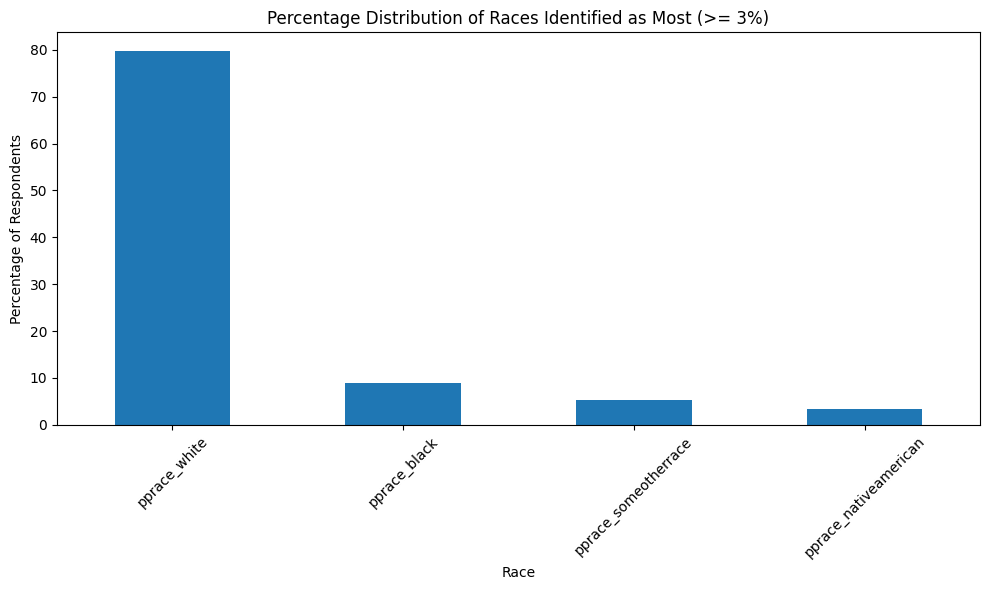

In [157]:
race_distribution = df[race_columns].apply(lambda col: (col == 1).sum())

total_count = race_distribution.sum()
race_distribution_percentage = (race_distribution / total_count) * 100

race_distribution_filtered = race_distribution_percentage[race_distribution_percentage >= 3]

# Sort the filtered distribution in descending order
race_distribution_filtered = race_distribution_filtered.sort_values(ascending=False)

# Plot the filtered and sorted distribution as a bar chart with percentages
plt.figure(figsize=(10, 6))
race_distribution_filtered.plot(kind='bar')
plt.title('Percentage Distribution of Races Identified as Most (>= 3%)')
plt.xlabel('Race')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()  # Optimize spacing
plt.show()

In [158]:
pphispan_mapping = {
    1: 0,  # 1 corresponds to "no"
    2: 1,  # 2 and higher correspond to "yes"
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    7: 1,
    8: 1
}

is_pphispan = df['pphispan'].map(pphispan_mapping)
is_pphispan_df = pd.DataFrame(is_pphispan.value_counts()).reset_index()
is_pphispan_df

,index,pphispan
0,0,3615
1,1,387


In [159]:
partner_race_mapping = {
    1: "White",
    2: "Black or African American",
    3: "American Indian, Aleut, or Eskimo",
    4: "Asian or Pacific Islander",
    5: "Other (please specify)"
}

# Map the 'q6b' column to descriptive labels
mapped_partner_race = df['q6b'].map(partner_race_mapping)

# Calculate the frequency of each category
partner_race_counts = mapped_partner_race.value_counts().sort_index()

# Convert counts to percentages
total_partner_race = partner_race_counts.sum()
partner_race_percentages = (partner_race_counts / total_partner_race * 100).round(1)

# Create a DataFrame with counts and percentages for q6b
partner_race_distribution = pd.DataFrame({
    'Category': partner_race_counts.index,
    'Count': partner_race_counts.values,
    'Percentage': partner_race_percentages.values
})

# Display the resulting DataFrame
partner_race_distribution


,Category,Count,Percentage
0,"American Indian, Aleut, or Eskimo",25,0.8
1,Asian or Pacific Islander,65,2.2
2,Black or African American,253,8.5
3,Other (please specify),120,4.0
4,White,2528,84.5


### Politics

In [160]:
# Define the mapping for PPPARTYID3
party_mapping = {
    1: "Republican",
    2: "Other",
    3: "Democrat"
}

# Map the 'PPPARTYID3' column to descriptive labels
mapped_party = df['pppartyid3'].map(party_mapping)

# Calculate the frequency of each category
party_counts = mapped_party.value_counts().sort_index()

# Convert counts to percentages
total_party = party_counts.sum()
party_percentages = (party_counts / total_party * 100).round(1)

# Create a DataFrame with counts and percentages for PPPARTYID3
party_distribution = pd.DataFrame({
    'Category': party_counts.index,
    'Count': party_counts.values,
    'Percentage': party_percentages.values
})

# Display the resulting DataFrame
party_distribution


,Category,Count,Percentage
0,Republican,1505,37.6
1,Other,112,2.8
2,Democrat,2385,59.6


### Sexual Orientation

In [161]:
# Define the mapping for glbstatus
glbstatus_mapping = {
    0: "Not GLB",
    1: "GLB"
}

# Map the 'glbstatus' column to descriptive labels
mapped_glbstatus = df['glbstatus'].map(glbstatus_mapping)

# Calculate the frequency of each category
glbstatus_counts = mapped_glbstatus.value_counts().sort_index()

# Convert counts to percentages
total_glbstatus = glbstatus_counts.sum()
glbstatus_percentages = (glbstatus_counts / total_glbstatus * 100).round(1)

# Create a DataFrame with counts and percentages for glbstatus
glbstatus_distribution = pd.DataFrame({
    'Category': glbstatus_counts.index,
    'Count': glbstatus_counts.values,
    'Percentage': glbstatus_percentages.values
})

# Display the resulting DataFrame
glbstatus_distribution


,Category,Count,Percentage
0,Not GLB,3047,76.1
1,GLB,955,23.9


In [162]:
# Define the mapping for partner gender
partner_gender_mapping = {
    1: "Male",
    2: "Female",
    3: "Other, please specify"
}

# Map the 'partner_gender' column to descriptive labels
mapped_partner_gender = df['q4'].map(partner_gender_mapping)

# Calculate the frequency of each category
partner_gender_counts = mapped_partner_gender.value_counts().sort_index()

# Convert counts to percentages
total_partner_gender = partner_gender_counts.sum()
partner_gender_percentages = (partner_gender_counts / total_partner_gender * 100).round(1)

# Create a DataFrame with counts and percentages for partner gender
partner_gender_distribution = pd.DataFrame({
    'Category': partner_gender_counts.index,
    'Count': partner_gender_counts.values,
    'Percentage': partner_gender_percentages.values
})

# Display the resulting DataFrame
partner_gender_distribution

,Category,Count,Percentage
0,Female,1520,50.5
1,Male,1486,49.3
2,"Other, please specify",6,0.2


In [163]:
# Define the mapping for q5
same_gender_mapping = {
    1: "Yes, we are a same-sex couple",
    2: "No, we are an opposite-sex couple"
}

# Map the 'q5' column to descriptive labels
same_gender = df['q5'].map(same_gender_mapping)

# Calculate the frequency of each category
same_gender_counts = same_gender.value_counts().sort_index()

# Convert counts to percentages3
total_same_gender = same_gender_counts.sum()
same_gender_percentages = (same_gender_counts / total_same_gender * 100).round(1)

# Create a DataFrame with counts and percentages for q5
same_gender_distribution = pd.DataFrame({
    'Category': same_gender_counts.index,
    'Count': same_gender_counts.values,
    'Percentage': same_gender_percentages.values
})

# Display the resulting DataFrame
same_gender_distribution


,Category,Count,Percentage
0,"No, we are an opposite-sex couple",214,31.6
1,"Yes, we are a same-sex couple",464,68.4


Now we want to check if there are **inconsistencies** in the dataset

In [164]:
# 1. Same-sex couples (q5 = 1) who are not GLB (glbstatus != 1)
inconsistent_same_sex_caseids = df[(df['q5'] == 1) & (df['glbstatus'] != 1)]['caseid_new'].nunique()

# 2. GLB individuals (glbstatus = 1) who reported being in an opposite-sex relationship (q5 = 2)
inconsistent_glb_opposite_sex_caseids = df[(df['glbstatus'] == 1) & (df['q5'] == 2)]['caseid_new'].nunique()

inconsistencies_summary = {
    "Unique CaseIDs for Same-Sex Couples Who Are Not GLB": inconsistent_same_sex_caseids,
    "Unique CaseIDs for GLB Individuals in Opposite-Sex Relationships": inconsistent_glb_opposite_sex_caseids
}

# Convert the summary to a DataFrame for display
inconsistencies_df = pd.DataFrame(list(inconsistencies_summary.items()), columns=['Description', 'Unique CaseID Count'])
inconsistencies_df


,Description,Unique CaseID Count
0,Unique CaseIDs for Same-Sex Couples Who Are No...,2
1,Unique CaseIDs for GLB Individuals in Opposite...,189


In [165]:
# Filter the inconsistencies
inconsistent_caseids = df[
    ((df['q5'] == 1) & (df['glbstatus'] != 1)) | ((df['glbstatus'] == 1) & (df['q5'] == 2))
]['caseid_new'].unique()

# Remove them from our dataset
df = df[~df['caseid_new'].isin(inconsistent_caseids)]

# Display the cleaned DataFrame
df

,caseid_new,weight1,weight2,ppage,ppeduc,ppgender,pphhhead,pphouseholdsize,pphouse,ppincimp,...,pp2_ppt1317,pp2_ppt18ov,pp2_ppt25,pp2_ppt612,pp2_ppwork,pp2_ppnet,pp2_ppcmdate_yrmo,w2_HCMST_interview_fin_yrmo,w2_q10,w2_broke_up
1,22526,4265,4265,52,12,2,1,2,3,7,...,0,2,0,0,4,1,1970-01-01 00:00:00.000200905,1970-01-01 00:00:00.000201003,0,0
2,23286,16485,16485,28,13,2,1,2,3,11,...,0,2,0,0,1,1,1970-01-01 00:00:00.000200904,1970-01-01 00:00:00.000201003,0,0
3,25495,52464,0,49,9,2,1,4,3,10,...,1,3,0,0,1,1,1970-01-01 00:00:00.000200904,1970-01-01 00:00:00.000000000,0,0
4,26315,4575,4575,31,11,1,1,1,3,11,...,0,1,0,0,1,1,1970-01-01 00:00:00.000200905,1970-01-01 00:00:00.000201003,1,1
5,27355,12147,0,35,9,1,1,2,2,11,...,0,2,0,0,2,1,1970-01-01 00:00:00.000200904,1970-01-01 00:00:00.000000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,4623505,50561,0,50,13,2,1,2,1,14,...,0,1,0,1,1,1,1970-01-01 00:00:00.000200904,1970-01-01 00:00:00.000000000,0,0
3999,4625902,23386,0,90,4,2,0,3,1,12,...,0,3,0,0,5,1,1970-01-01 00:00:00.000200904,1970-01-01 00:00:00.000000000,0,0
4000,4626536,2121,2121,53,11,2,0,2,2,18,...,0,0,0,0,0,0,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0,0
4001,4627251,41771,41771,25,11,2,1,3,1,13,...,0,0,0,0,0,0,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0,0


### How they met

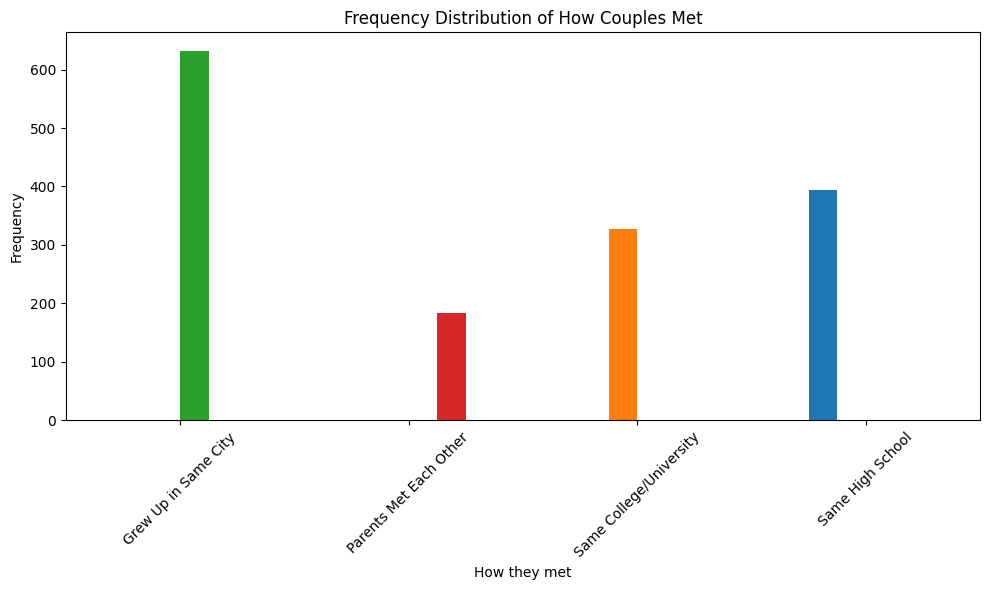

In [166]:
how_couples_met_mappings = {
    'q25': {1: "Same High School", 2: "Different High School"},
    'q26': {1: "Same College/University", 2: "Different College/University"},
    'q27': {1: "Grew Up in Same City", 2: "Did Not Grow Up in Same City"},
    'q28': {1: "Parents Met Each Other", 2: "Parents Did Not Meet Each Other"}
}

# Create a dictionary to store frequencies of each question for the value "1" only
frequency_data = {}

# Map each question, filter for value "1" only, and calculate the frequency
for question, mapping in how_couples_met_mappings.items():
    # Filter to include only rows where the value is 1
    filtered_data = df[df[question] == 1]
    # Map the filtered data to descriptive labels
    mapped_data = filtered_data[question].map(mapping)
    # Count the occurrences
    counts = mapped_data.value_counts().sort_index()
    frequency_data[question] = counts

# Create a single DataFrame for visualization
frequency_df = pd.DataFrame(frequency_data).fillna(0)  # Fill NaN with 0 for consistent plotting

# Plot each question's frequency distribution in a bar chart
frequency_df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title("Frequency Distribution of How Couples Met")
plt.xlabel("How they met")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()  # Optimize spacing
plt.show()


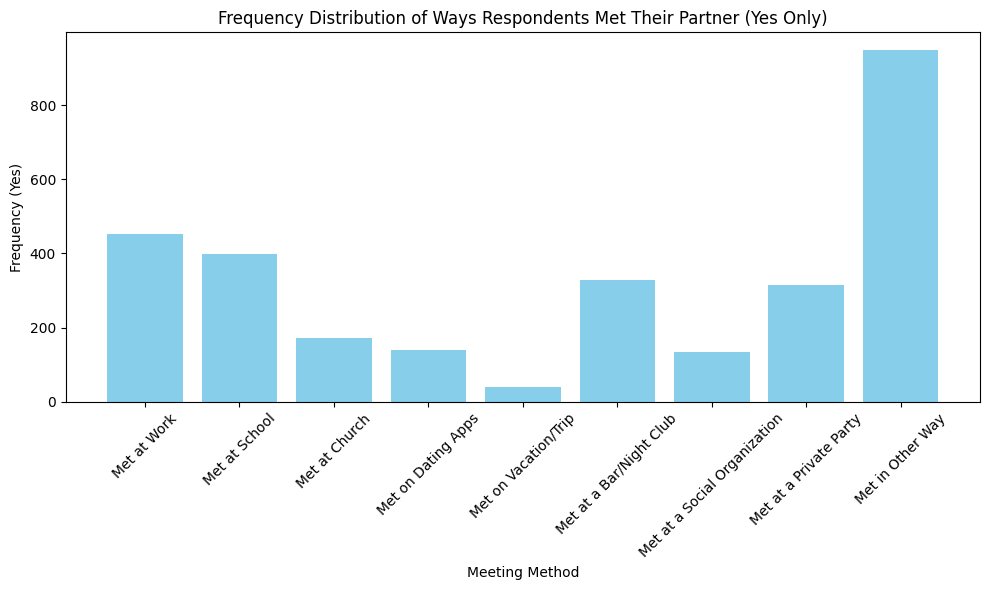

In [167]:
# Define the dictionaries for meeting places and labels
meeting_place = {
    'q31_1': {0: "No", 1: "Yes"},
    'q31_2': {0: "No", 1: "Yes"},
    'q31_3': {0: "No", 1: "Yes"},
    'q31_4': {0: "No", 1: "Yes"},
    'q31_5': {0: "No", 1: "Yes"},
    'q31_6': {0: "No", 1: "Yes"},
    'q31_7': {0: "No", 1: "Yes"},
    'q31_8': {0: "No", 1: "Yes"},
    'q31_other_text_entered': {0: "No", 1: "Yes"}
}

place_labels = {
    'q31_1': "Met at Work",
    'q31_2': "Met at School",
    'q31_3': "Met at Church",
    'q31_4': "Met on Dating Apps",
    'q31_5': "Met on Vacation/Trip",
    'q31_6': "Met at a Bar/Night Club",
    'q31_7': "Met at a Social Organization",
    'q31_8': "Met at a Private Party",
    'q31_other_text_entered': "Met in Other Way"
}

# Dictionary to store frequencies for each meeting method where the value is 1 (Yes)
meeting_frequencies = {}

# Calculate the frequency for each meeting method, counting only "Yes" responses (value = 1)
for question, label in place_labels.items():
    # Count occurrences of 1 (Yes) for each question
    meeting_frequencies[label] = df[question].value_counts().get(1, 0)

# Convert the dictionary to a DataFrame for visualization
meeting_df = pd.DataFrame(list(meeting_frequencies.items()), columns=['Meeting Method', 'Count'])

# Plot the frequency distribution in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(meeting_df['Meeting Method'], meeting_df['Count'], color='skyblue')
plt.title("Frequency Distribution of Ways Respondents Met Their Partner (Yes Only)")
plt.xlabel("Meeting Method")
plt.ylabel("Frequency (Yes)")
plt.xticks(rotation=45)
plt.tight_layout()  # Optimize spacing
plt.show()


In [168]:
# Define the mapping for q32
is_internet_mapping = {
    1: "Yes, a Social Networking Site",
    2: "No, We Did Not Meet Through the Internet",
    3: "Yes, an Internet Dating or Matchmaking Site"
}

# Map the 'q32' column to descriptive labels
is_internet = df['q32'].map(is_internet_mapping)

# Calculate the frequency of each category
is_internet_counts = is_internet.value_counts().sort_index()

# Convert counts to percentages
total_is_internet = is_internet_counts.sum()
is_internet_percentages = (is_internet_counts / total_is_internet * 100).round(1)

# Create a DataFrame with counts and percentages for q32
is_internet_distribution = pd.DataFrame({
    'Category': is_internet_counts.index,
    'Count': is_internet_counts.values,
    'Percentage': is_internet_percentages.values
})

# Display the resulting DataFrame
is_internet_distribution

,Category,Count,Percentage
0,"No, We Did Not Meet Through the Internet",2541,94.9
1,"Yes, a Social Networking Site",47,1.8
2,"Yes, an Internet Dating or Matchmaking Site",89,3.3


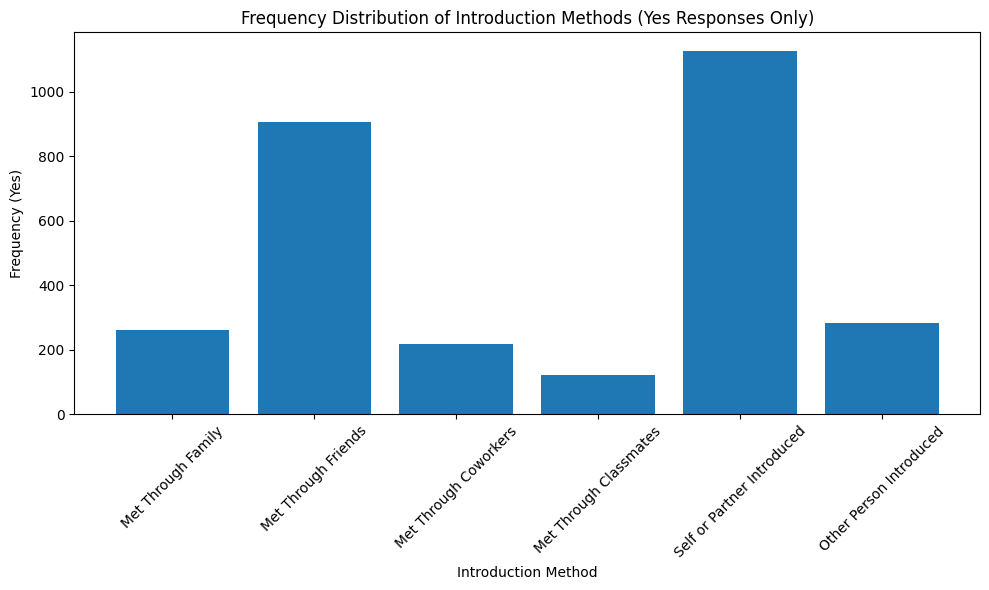

In [169]:
4# Define mappings and descriptive labels for each question in q33 series
q33_mappings = {
    'q33_1': {0: "No", 1: "Yes"},
    'q33_2': {0: "No", 1: "Yes"},
    'q33_3': {0: "No", 1: "Yes"},
    'q33_4': {0: "No", 1: "Yes"},
    'q33_6': {0: "No", 1: "Yes"},
    'q33_7': {0: "No", 1: "Yes"},
}

# Define descriptive labels for each question
q33_labels = {
    'q33_1': "Met Through Family",
    'q33_2': "Met Through Friends",
    'q33_3': "Met Through Coworkers",
    'q33_4': "Met Through Classmates",
    'q33_6': "Self or Partner Introduced",
    'q33_7': "Other Person Introduced",
    'q33_8': "Other"
}

# Dictionary to store frequencies for "Yes" only
q33_frequencies = {}

# Apply mapping and calculate frequency of "Yes" for each question
for question, mapping in q33_mappings.items():
    # Map values in each column and count occurrences of "Yes" (value 1)
    mapped_data = df[question].map(mapping)
    q33_frequencies[q33_labels[question]] = mapped_data.value_counts().get("Yes", 0)

# Convert dictionary to a DataFrame for visualization
q33_df = pd.DataFrame(list(q33_frequencies.items()), columns=['Introduction Method', 'Count'])

# Plot the frequency distribution in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(q33_df['Introduction Method'], q33_df['Count'])
plt.title("Frequency Distribution of Introduction Methods (Yes Responses Only)")
plt.xlabel("Introduction Method")
plt.ylabel("Frequency (Yes)")
plt.xticks(rotation=45)
plt.tight_layout()  # Optimize spacing
plt.show()


### Income 

In [170]:
income_mapping = {
    1: "Less than 5,000",
    2: "5,000 to 7,499",
    3: "7,500 to 9,999",
    4: "10,000 to 12,499",
    5: "12,500 to 14,999",
    6: "15,000 to 19,999",
    7: "20,000 to 24,999",
    8: "25,000 to 29,999",
    9: "30,000 to 34,999",
    10: "35,000 to 39,999",
    11: "40,000 to 49,999",
    12: "50,000 to 59,999",
    13: "60,000 to 74,999",
    14: "75,000 to 84,999",
    15: "85,000 to 99,999",
    16: "100,000 to 124,999",
    17: "125,000 to 149,999",
    18: "150,000 to 174,999",
    19: "175,000 or more"
}

# Map the 'ppincimp' column to descriptive income ranges
mapped_income = df['ppincimp'].map(income_mapping)

# Calculate the frequency of each income range
income_counts = mapped_income.value_counts().sort_index()

# Convert counts to percentages
total_income = income_counts.sum()
income_percentages = (income_counts / total_income * 100).round(1)

# Create a DataFrame with counts and percentages for household income
income_distribution = pd.DataFrame({
    'Income Range': income_counts.index,
    'Count': income_counts.values,
    'Percentage': income_percentages.values
})

# Sort the income distribution DataFrame from least to most common based on count
income_distribution_sorted = income_distribution.sort_values(by='Count')

# Display the sorted DataFrame
income_distribution_sorted


,Income Range,Count,Percentage
0,"Less than 5,000",43,1.1
1,"5,000 to 7,499",52,1.4
4,"12,500 to 14,999",79,2.1
17,"150,000 to 174,999",81,2.1
2,"7,500 to 9,999",94,2.5
3,"10,000 to 12,499",102,2.7
18,"175,000 or more",122,3.2
5,"15,000 to 19,999",149,3.9
16,"125,000 to 149,999",156,4.1
8,"30,000 to 34,999",195,5.1


In [171]:
# Define the mapping for employment status (ppwork)
ppwork_mapping = {
    1: "Working - as a Paid Employee",
    2: "Working - Self-Employed",
    3: "Not Working - On Temporary Layoff from a Job",
    4: "Not Working - Looking for Work",
    5: "Not Working - Retired",
    6: "Not Working - Disabled",
    7: "Not Working - Other"
}

# Map the 'ppwork' column to descriptive employment status
mapped_work_status = df['ppwork'].map(ppwork_mapping)

# Calculate the frequency of each employment status
work_status_counts = mapped_work_status.value_counts().sort_index()

# Convert counts to percentages
total_work_status = work_status_counts.sum()
work_status_percentages = (work_status_counts / total_work_status * 100).round(1)

# Create a DataFrame with counts and percentages for employment status
work_status_distribution = pd.DataFrame({
    'Employment Status': work_status_counts.index,
    'Count': work_status_counts.values,
    'Percentage': work_status_percentages.values
})

# Sort the employment status DataFrame from lowest to highest based on count
work_status_distribution_sorted = work_status_distribution.sort_values(by='Count')

# Display the sorted DataFrame
work_status_distribution_sorted


,Employment Status,Count,Percentage
2,Not Working - On Temporary Layoff from a Job,19,0.5
3,Not Working - Looking for Work,171,4.5
6,Not Working - Other,276,7.2
1,Working - Self-Employed,323,8.5
5,Not Working - Disabled,324,8.5
4,Not Working - Retired,623,16.3
0,Working - as a Paid Employee,2075,54.4


In [172]:
# Define the mapping for income comparison (q23)
q23_mapping = {
    1: "I Earned More",
    2: "We Earned About the Same Amount",
    3: "Partner Earned More"
}

# Map the 'q23' column to descriptive labels for income comparison
mapped_income_comparison = df['q23'].map(q23_mapping)

# Calculate the frequency of each income comparison response
income_comparison_counts = mapped_income_comparison.value_counts().sort_index()

# Convert counts to percentages
total_income_comparison = income_comparison_counts.sum()
income_comparison_percentages = (income_comparison_counts / total_income_comparison * 100).round(1)

# Create a DataFrame with counts and percentages for income comparison
income_comparison_distribution = pd.DataFrame({
    'Income Comparison': income_comparison_counts.index,
    'Count': income_comparison_counts.values,
    'Percentage': income_comparison_percentages.values
})

# Sort the DataFrame by count in ascending order
income_comparison_distribution_sorted = income_comparison_distribution.sort_values(by='Count')

# Display the sorted DataFrame
income_comparison_distribution_sorted


,Income Comparison,Count,Percentage
2,We Earned About the Same Amount,352,12.6
1,Partner Earned More,1183,42.4
0,I Earned More,1253,44.9


### Household

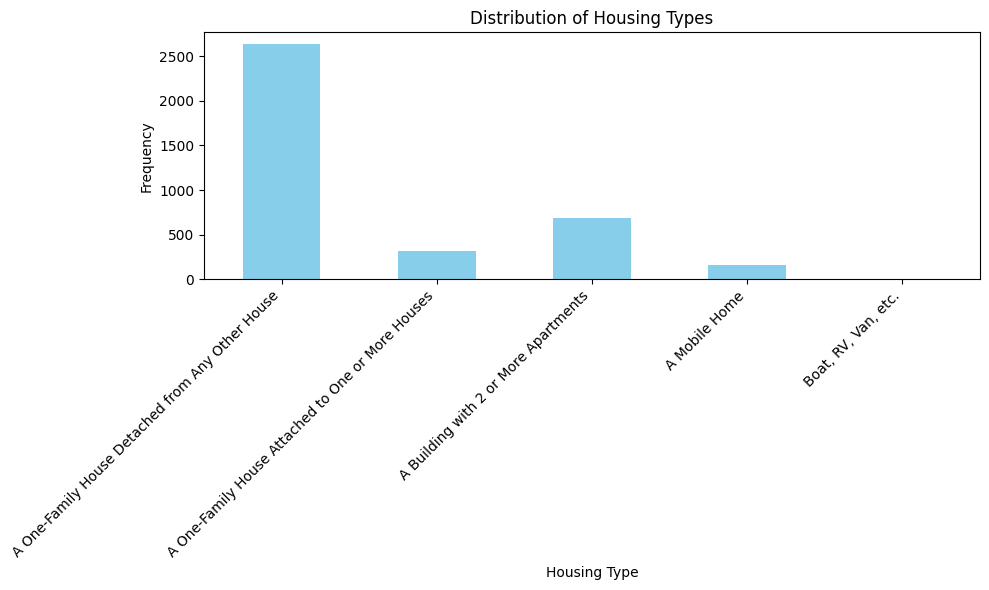

In [173]:
# Define the mapping for type of housing (pphouse)
pphouse_mapping = {
    1: "A One-Family House Detached from Any Other House",
    2: "A One-Family House Attached to One or More Houses",
    3: "A Building with 2 or More Apartments",
    4: "A Mobile Home",
    5: "Boat, RV, Van, etc."
}

# Map the 'pphouse' column to descriptive housing types
mapped_pphouse = df['pphouse'].map(pphouse_mapping)

# Calculate the frequency of each housing type
pphouse_counts = mapped_pphouse.value_counts().sort_index()

# Plot the data in a bar chart
plt.figure(figsize=(10, 6))
pphouse_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Housing Types")
plt.xlabel("Housing Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [174]:
# Define the mapping for metro vs. non-metro areas (ppmsacat)
ppmsacat_mapping = {
    0: "Non-Metro",
    1: "Metro"
}

# Map the 'ppmsacat' column to descriptive labels
mapped_ppmsacat = df['ppmsacat'].map(ppmsacat_mapping)

# Calculate the frequency of each category
ppmsacat_counts = mapped_ppmsacat.value_counts().sort_index()

# Convert counts to percentages
total_ppmsacat = ppmsacat_counts.sum()
ppmsacat_percentages = (ppmsacat_counts / total_ppmsacat * 100).round(1)

# Create a DataFrame with counts and percentages for metro vs. non-metro
ppmsacat_distribution = pd.DataFrame({
    'Category': ppmsacat_counts.index,
    'Count': ppmsacat_counts.values,
    'Percentage': ppmsacat_percentages.values
})

# Sort the DataFrame by count in ascending order
ppmsacat_distribution_sorted = ppmsacat_distribution.sort_values(by='Count')

# Display the sorted DataFrame
ppmsacat_distribution_sorted


,Category,Count,Percentage
0,Non-Metro,544,14.3
1,Metro,3267,85.7


In [175]:
# Define the mapping for home occupancy types (pprent)
pprent_mapping = {
    1: "Owned or being bought",
    2: "Rented for cash",
    3: "Occupied without payment of cash rent"
}

# Map the 'pprent' column to descriptive labels
mapped_pprent = df['pprent'].map(pprent_mapping)

# Calculate the frequency of each category
pprent_counts = mapped_pprent.value_counts().sort_index()

# Convert counts to percentages
total_pprent = pprent_counts.sum()
pprent_percentages = (pprent_counts / total_pprent * 100).round(1)

# Create a DataFrame with counts and percentages for occupancy types
pprent_distribution = pd.DataFrame({
    'Category': pprent_counts.index,
    'Count': pprent_counts.values,
    'Percentage': pprent_percentages.values
})

# Sort the DataFrame by count in ascending order
pprent_distribution_sorted = pprent_distribution.sort_values(by='Count')

# Display the sorted DataFrame
pprent_distribution_sorted

,Category,Count,Percentage
2,Occupied without payment of cash rent,65,1.7
1,Rented for cash,839,22.0
0,Owned or being bought,2907,76.3


In [176]:
# Define the mapping for home occupancy types in PP2_PPRENT
pp2_pprent_mapping = {
    1: "Owned or being bought",
    2: "Rented for cash",
    3: "Occupied without payment of cash rent"
}

# Map the 'PP2_PPRENT' column to descriptive labels
mapped_pp2_pprent = df['pp2_pprent'].map(pp2_pprent_mapping)

# Calculate the frequency of each category
pp2_pprent_counts = mapped_pp2_pprent.value_counts().sort_index()

# Convert counts to percentages
total_pp2_pprent = pp2_pprent_counts.sum()
pp2_pprent_percentages = (pp2_pprent_counts / total_pp2_pprent * 100).round(1)

# Create a DataFrame with counts and percentages for occupancy types
pp2_pprent_distribution = pd.DataFrame({
    'Category': pp2_pprent_counts.index,
    'Count': pp2_pprent_counts.values,
    'Percentage': pp2_pprent_percentages.values
})

# Sort the DataFrame by count in ascending order
pp2_pprent_distribution_sorted = pp2_pprent_distribution.sort_values(by='Count')

# Display the sorted DataFrame
pp2_pprent_distribution_sorted


,Category,Count,Percentage
0,Occupied without payment of cash rent,60,1.7
2,Rented for cash,778,22.1
1,Owned or being bought,2679,76.2


In [177]:
# Filter for rows where the value of 'pprent' is different from 'pp2_pprent' for each unique 'caseid_new'
different_pprent = df[df['caseid_new'].isin(df[df['pprent'].astype(str) != df['pp2_pprent'].astype(str)]['caseid_new'])]

# Define the mapping for 'w2_broke_up' values
w2_broke_up_mapping = {
    0: "Still together",
    1: "Broke up",
    2: "Partner passed away"
}

# Map 'w2_broke_up' values within the temporary filtered DataFrame
different_pprent['w2_broke_up_mapped'] = different_pprent['w2_broke_up'].map(w2_broke_up_mapping)

# Calculate the frequency of each breakup status (w2_broke_up_mapped) among those respondents
w2_broke_up_counts = different_pprent['w2_broke_up_mapped'].value_counts().sort_index()

# Convert counts to percentages
total_different = w2_broke_up_counts.sum()
w2_broke_up_percentages = (w2_broke_up_counts / total_different * 100).round(1)

# Create a DataFrame with counts and percentages for breakup status
w2_broke_up_distribution_different = pd.DataFrame({
    'Breakup Status': w2_broke_up_counts.index,
    'Count': w2_broke_up_counts.values,
    'Percentage': w2_broke_up_percentages.values
})

# Display the resulting DataFrame
w2_broke_up_distribution_different


/tmp/ipykernel_3465/2299127385.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  different_pprent['w2_broke_up_mapped'] = different_pprent['w2_broke_up'].map(w2_broke_up_mapping)
/tmp/ipykernel_3465/2299127385.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_pprent['w2_broke_up_mapped'] = different_pprent['w2_broke_up'].map(w2_broke_up_mapping)


,Breakup Status,Count,Percentage
0,Still together,501,93.6
1,Broke up,29,5.4
2,Partner passed away,5,0.9


In [178]:
# Define the mapping for 'q19' (living with partner status)
q19_mapping = {
    1: "Yes",
    2: "No"
}

# Map the 'q19' column to descriptive labels
mapped_q19 = df['q19'].map(q19_mapping)

# Calculate the frequency of each category
q19_counts = mapped_q19.value_counts().sort_index()

# Convert counts to percentages
total_q19 = q19_counts.sum()
q19_percentages = (q19_counts / total_q19 * 100).round(1)

# Create a DataFrame with counts and percentages for 'q19' categories
q19_distribution = pd.DataFrame({
    'Category': q19_counts.index,
    'Count': q19_counts.values,
    'Percentage': q19_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
q19_distribution_sorted = q19_distribution.sort_values(by='Count')

# Display the sorted DataFrame
q19_distribution_sorted


,Category,Count,Percentage
0,No,602,21.4
1,Yes,2213,78.6


In [179]:
# Define the mapping for 'q20' (have you ever lived with a partner)
q20_mapping = {
    1: "Yes",
    2: "No"
}

# Map the 'q20' column to descriptive labels
mapped_q20 = df['q20'].map(q20_mapping)

# Calculate the frequency of each category
q20_counts = mapped_q20.value_counts().sort_index()

# Convert counts to percentages
total_q20 = q20_counts.sum()
q20_percentages = (q20_counts / total_q20 * 100).round(1)

# Create a DataFrame with counts and percentages for 'q20' categories
q20_distribution = pd.DataFrame({
    'Category': q20_counts.index,
    'Count': q20_counts.values,
    'Percentage': q20_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
q20_distribution_sorted = q20_distribution.sort_values(by='Count')

# Display the sorted DataFrame
q20_distribution_sorted


,Category,Count,Percentage
1,Yes,161,26.7
0,No,442,73.3


In [180]:
### Filter for rows where 'q19' is different from 'q20' for each unique 'caseid_new'
different_living_status = df[df['caseid_new'].isin(df[df['q19'] != df['q20']]['caseid_new'])]

q34_mapping = {
    1: "Excellent",
    2: "Good",
    3: "Fair",
    4: "Poor",
    5: "Very Poor"
}

# Apply the mapping to 'q34' in the filtered DataFrame
different_living_status['q34_mapped'] = different_living_status['q34'].map(q34_mapping)

# Calculate the frequency of each relationship quality (q34_mapped) among those respondents
relationship_quality_counts = different_living_status['q34_mapped'].value_counts().sort_index()

# Convert counts to percentages
total_different = relationship_quality_counts.sum()
relationship_quality_percentages = (relationship_quality_counts / total_different * 100).round(1)

# Create a DataFrame with counts and percentages for relationship quality
relationship_quality_distribution_different = pd.DataFrame({
    'Relationship Quality': relationship_quality_counts.index,
    'Count': relationship_quality_counts.values,
    'Percentage': relationship_quality_percentages.values
})

# Display the resulting DataFrame
relationship_quality_distribution_different

/tmp/ipykernel_3465/931581172.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  different_living_status['q34_mapped'] = different_living_status['q34'].map(q34_mapping)
/tmp/ipykernel_3465/931581172.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_living_status['q34_mapped'] = different_living_status['q34'].map(q34_mapping)


,Relationship Quality,Count,Percentage
0,Excellent,1469,62.1
1,Fair,173,7.3
2,Good,674,28.5
3,Poor,30,1.3
4,Very Poor,19,0.8


In [181]:
q34_mapping = {
    1: "Excellent",
    2: "Good",
    3: "Fair",
    4: "Poor",
    5: "Very Poor"
}

def calculate_relationship_quality_distribution(df, q19_val, q20_val, q34_mapping):
    # Filter based on specified q19 and q20 values, treating them as strings
    condition_df = df[(df['q20'].astype(str) == str(q20_val)) & (df['q19'].astype(str) == str(q19_val))].copy()
    
    # Map 'q34' values to descriptive labels in the filtered DataFrame
    condition_df['q34_mapped'] = condition_df['q34'].map(q34_mapping)
    
    # Calculate frequency and percentage for each relationship quality
    relationship_quality_counts = condition_df['q34_mapped'].value_counts().sort_index()
    total_count = relationship_quality_counts.sum()
    relationship_quality_percentages = (relationship_quality_counts / total_count * 100).round(1)
    
    # Create and return the distribution DataFrame
    return pd.DataFrame({
        'Relationship Quality': relationship_quality_counts.index,
        'Count': relationship_quality_counts.values,
        'Percentage': relationship_quality_percentages.values
    })

# Calculate distributions for each condition
relationship_quality_distribution_1 = calculate_relationship_quality_distribution(df, 2, 1, q34_mapping)  # q20=2, q19=1
relationship_quality_distribution_2 = calculate_relationship_quality_distribution(df, 1, 1, q34_mapping)  # q20=1, q19=1
relationship_quality_distribution_3 = calculate_relationship_quality_distribution(df, 2, 2, q34_mapping)  # q20=2, q19=2

/tmp/ipykernel_3465/1014267959.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  condition_df['q34_mapped'] = condition_df['q34'].map(q34_mapping)


In [182]:
print("Relationship Quality Distribution when they have lived with a partner but are not living together now")
relationship_quality_distribution_1

Relationship Quality Distribution when they have lived with a partner but are not living together now


,Relationship Quality,Count,Percentage
0,Excellent,59,37.6
1,Fair,39,24.8
2,Good,42,26.8
3,Poor,8,5.1
4,Very Poor,9,5.7


In [183]:
print("\nRelationship Quality Distribution when not living together and have never lived with a partner before")
relationship_quality_distribution_3


Relationship Quality Distribution when not living together and have never lived with a partner before


,Relationship Quality,Count,Percentage
0,Excellent,197,44.8
1,Fair,59,13.4
2,Good,177,40.2
3,Poor,7,1.6


In [184]:
# Define the mapping for 'ppmarit' marital statuses
ppmarit_mapping = {
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "Never Married",
    6: "Living with Partner"    
}

# Map the 'ppmarit' column to descriptive labels
ppmarit_mapped = df['ppmarit'].map(ppmarit_mapping)

# Filter data for households with 18-year-old children (ppt180v > 0) and households with any children (children_in_hh > 0)
has_18yo_kids = df[df['ppt18ov'] > 0]
has_any_kids = df[df['children_in_hh'] > 0]

# Calculate frequency of 'ppmarit' for households with 18-year-old children
ppmarit_counts_18yo = has_18yo_kids['ppmarit'].map(ppmarit_mapping).value_counts().sort_index()

# Calculate frequency of 'ppmarit' for households with any children
ppmarit_counts_any_kids = has_any_kids['ppmarit'].map(ppmarit_mapping).value_counts().sort_index()

# Create a DataFrame with these frequencies
ppmarit_distribution = pd.DataFrame({
    'Marital Status': ppmarit_counts_18yo.index,
    'Count (18yo Kids)': ppmarit_counts_18yo.values,
    'Count (Any Kids)': ppmarit_counts_any_kids.values
})

# Display the DataFrame
ppmarit_distribution


,Marital Status,Count (18yo Kids),Count (Any Kids)
0,Married,1627,570
1,Widowed,201,9
2,Divorced,461,59
3,Separated,57,19
4,Never Married,988,156
5,Living with Partner,477,49


In [185]:
# Create a temporary series for 'pp2_children_in_hh' by summing the columns
pp2_children_in_hh = df[['pp2_ppt01', 'pp2_ppt1317', 'pp2_ppt25']].sum(axis=1)

# Define the mapping for 'pp2_ppmarit' marital statuses
pp2_ppmarit_mapping = {
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "Never Married",
    6: "Living with Partner"
}

# Map the 'pp2_ppmarit' column to descriptive labels
pp2_ppmarit_mapped = df['pp2_ppmarit'].map(pp2_ppmarit_mapping)

# Filter data for households with 18-year-old children (pp2_ppt18ov > 0)
has_18yo_kids = df[df['pp2_ppt18ov'] > 0]

# Filter data for households with any children (using pp2_children_in_hh > 0 from the temporary series)
has_any_kids = df[pp2_children_in_hh > 0]

# Calculate frequency of 'pp2_ppmarit' for households with 18-year-old children
pp2_ppmarit_counts_18yo = has_18yo_kids['pp2_ppmarit'].map(pp2_ppmarit_mapping).value_counts().sort_index()

# Calculate frequency of 'pp2_ppmarit' for households with any children
pp2_ppmarit_counts_any_kids = has_any_kids['pp2_ppmarit'].map(pp2_ppmarit_mapping).value_counts().sort_index()

# Create a DataFrame with these frequencies
pp2_ppmarit_distribution = pd.DataFrame({
    'Marital Status': pp2_ppmarit_counts_18yo.index,
    'Count (18yo Kids)': pp2_ppmarit_counts_18yo.values,
    'Count (Any Kids)': pp2_ppmarit_counts_any_kids.values
})

# Display the DataFrame
pp2_ppmarit_distribution


,Marital Status,Count (18yo Kids),Count (Any Kids)
0,Divorced,426,46
1,Living with Partner,434,55
2,Married,1553,567
3,Never Married,846,122
4,Separated,56,13
5,Widowed,202,6


### Marital Status

In [186]:
#Calculate the frequency of each category
ppmarit_counts = ppmarit_mapped.value_counts().sort_index()

# Convert counts to percentages
total_ppmarit = ppmarit_counts.sum()
ppmarit_percentages = (ppmarit_counts / total_ppmarit * 100).round(1)

# Create a DataFrame with counts and percentages for 'q19' categories
ppmarit_distribution = pd.DataFrame({
    'Category': ppmarit_counts.index,
    'Count': ppmarit_counts.values,
    'Percentage': ppmarit_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
ppmarit_distribution_sorted = ppmarit_distribution.sort_values(by='Count')

# Display the sorted DataFrame
ppmarit_distribution_sorted

,Category,Count,Percentage
3,Separated,57,1.5
1,Widowed,201,5.3
2,Divorced,461,12.1
5,Living with Partner,477,12.5
4,Never Married,988,25.9
0,Married,1627,42.7


In [187]:
# Define the mapping for 's1' (are you married)
s1_mapping = {
    1: "Yes, I am married",
    2: "No, I am not married"
}

# Map the 's1' column to descriptive labels
mapped_s1 = df['s1'].map(s1_mapping)

# Calculate the frequency of each category
s1_counts = mapped_s1.value_counts().sort_index()

# Convert counts to percentages
total_s1 = s1_counts.sum()
s1_percentages = (s1_counts / total_s1 * 100).round(1)

# Create a DataFrame with counts and percentages for 's1' categories
s1_distribution = pd.DataFrame({
    'Category': s1_counts.index,
    'Count': s1_counts.values,
    'Percentage': s1_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
s1_distribution_sorted = s1_distribution.sort_values(by='Count')

# Display the sorted DataFrame
s1_distribution_sorted

,Category,Count,Percentage
0,"Yes, I am married",1809,47.5
1,"No, I am not married",2002,52.5


In [188]:
# Define the mapping for 's2' relationship status
s2_mapping = {
    1: "Yes, I have a sexual partner",
    2: "I have a romantic partner who is not yet a sexual partner",
    3: "No, I am single"
}

# Map the 's2' column to descriptive labels
mapped_s2 = df['s2'].map(s2_mapping)

# Calculate the frequency of each category
s2_counts = mapped_s2.value_counts().sort_index()

# Convert counts to percentages
total_s2 = s2_counts.sum()
s2_percentages = (s2_counts / total_s2 * 100).round(1)

# Create a DataFrame with counts and percentages for 's2' categories
s2_distribution = pd.DataFrame({
    'Category': s2_counts.index,
    'Count': s2_counts.values,
    'Percentage': s2_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
s2_distribution_sorted = s2_distribution.sort_values(by='Count')

# Display the sorted DataFrame
s2_distribution_sorted

,Category,Count,Percentage
0,I have a romantic partner who is not yet a sex...,101,5.1
2,"Yes, I have a sexual partner",914,45.7
1,"No, I am single",985,49.2


In [189]:
## Define the mapping for 'q17b' (number of times married)
q17b_mapping = {
    1: "Never married",
    2: "Once",
    3: "Twice",
    4: "Three times",
    5: "Four or more times"
}

# Map the 'q17b' column to descriptive labels
mapped_q17b = df['q17b'].map(q17b_mapping)

# Calculate the frequency of each category
q17b_counts = mapped_q17b.value_counts().sort_index()

# Convert counts to percentages
total_q17b = q17b_counts.sum()
q17b_percentages = (q17b_counts / total_q17b * 100).round(1)

# Create a DataFrame with counts and percentages for 'q17b' categories
q17b_distribution = pd.DataFrame({
    'Category': q17b_counts.index,
    'Count': q17b_counts.values,
    'Percentage': q17b_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
q17b_distribution_sorted = q17b_distribution.sort_values(by='Count')

# Display the sorted DataFrame
q17b_distribution_sorted


,Category,Count,Percentage
0,Four or more times,5,0.5
3,Three times,14,1.4
4,Twice,83,8.2
2,Once,227,22.5
1,Never married,682,67.5


### Education

In [190]:
# Define the mapping for 'ppeduc' (respondent education level)
ppeduc_mapping = {
    1: "No formal education",
    2: "1st, 2nd, 3rd, or 4th grade",
    3: "5th or 6th grade",
    4: "7th or 8th grade",
    5: "9th grade",
    6: "10th grade",
    7: "11th grade",
    8: "12th grade, no diploma",
    9: "High school graduate or GED",
    10: "Some college, no degree", 
    11: "Associate degree",
    12: "Bachelor's degree",
    13: "Master's degree",
    14: "Professional or Doctorate degree"
}

# Map the 'ppeduc' column to descriptive labels
mapped_ppeduc = df['ppeduc'].map(ppeduc_mapping)

# Calculate the frequency of each category
ppeduc_counts = mapped_ppeduc.value_counts().sort_index()

# Convert counts to percentages
total_ppeduc = ppeduc_counts.sum()
ppeduc_percentages = (ppeduc_counts / total_ppeduc * 100).round(1)

# Create a DataFrame with counts and percentages for 'ppeduc' categories
ppeduc_distribution = pd.DataFrame({
    'Category': ppeduc_counts.index,
    'Count': ppeduc_counts.values,
    'Percentage': ppeduc_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
ppeduc_distribution_sorted = ppeduc_distribution.sort_values(by='Count')

# Display the sorted DataFrame
ppeduc_distribution_sorted

,Category,Count,Percentage
0,No formal education,1,0.0
1,"1st, 2nd, 3rd, or 4th grade",2,0.1
2,5th or 6th grade,8,0.2
4,9th grade,48,1.3
3,7th or 8th grade,50,1.3
5,10th grade,70,1.8
6,11th grade,94,2.5
7,"12th grade, no diploma",116,3.0
13,Professional or Doctorate degree,150,3.9
10,Associate degree,284,7.5


In [191]:
# Define the mapping for 'q10' (partner's highest education level)
q10_mapping = {
    1: "No formal education",
    2: "1st - 4th grade",
    3: "5th or 6th grade",
    4: "7th or 8th grade",
    5: "9th grade",
    6: "10th grade",
    7: "11th grade",
    8: "12th grade, no diploma",
    9: "HS graduate or GED",
    10: "Some college, no degree",
    11: "Associate degree",
    12: "Bachelor's degree",
    13: "Master's degree",
    14: "Professional or Doctorate degree"
}

# Map the 'q10' column to descriptive labels
mapped_q10 = df['q10'].map(q10_mapping)

# Calculate the frequency of each category
q10_counts = mapped_q10.value_counts().sort_index()

# Convert counts to percentages
total_q10 = q10_counts.sum()
q10_percentages = (q10_counts / total_q10 * 100).round(1)

# Create a DataFrame with counts and percentages for 'q10' categories
q10_distribution = pd.DataFrame({
    'Category': q10_counts.index,
    'Count': q10_counts.values,
    'Percentage': q10_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
q10_distribution_sorted = q10_distribution.sort_values(by='Count')

# Display the sorted DataFrame
q10_distribution_sorted

,Category,Count,Percentage
11,No formal education,2,0.1
3,1st - 4th grade,5,0.2
4,5th or 6th grade,13,0.5
6,9th grade,22,0.8
5,7th or 8th grade,25,0.9
0,10th grade,47,1.7
1,11th grade,49,1.7
2,"12th grade, no diploma",72,2.6
12,Professional or Doctorate degree,100,3.6
7,Associate degree,252,9.0


In [192]:
# Define the mapping for 'w2_broke_up' status
w2_broke_up_mapping = {
    0: "Still together",
    1: "Broke up"
}

# Filter for rows where 'ppeduc' is different from 'q10' for each unique 'caseid_new'
different_education = df[df['caseid_new'].isin(df.loc[mapped_ppeduc != mapped_q10, 'caseid_new'])]


# Map 'w2_broke_up' values to descriptive labels in the temporary filtered DataFrame
different_education['w2_broke_up_mapped'] = different_education['w2_broke_up'].map(w2_broke_up_mapping)

# Calculate the frequency of each breakup status (w2_broke_up_mapped) among those cases
w2_broke_up_counts = different_education['w2_broke_up_mapped'].value_counts().sort_index()

# Convert counts to percentages
total_different_cases = w2_broke_up_counts.sum()
w2_broke_up_percentages = (w2_broke_up_counts / total_different_cases * 100).round(1)

# Create a DataFrame with counts and percentages for breakup status
w2_broke_up_distribution_different = pd.DataFrame({
    'Breakup Status': w2_broke_up_counts.index,
    'Count': w2_broke_up_counts.values,
    'Percentage': w2_broke_up_percentages.values
})

# Display the resulting DataFrame
w2_broke_up_distribution_different

/tmp/ipykernel_3465/54808902.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  different_education['w2_broke_up_mapped'] = different_education['w2_broke_up'].map(w2_broke_up_mapping)
/tmp/ipykernel_3465/54808902.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_education['w2_broke_up_mapped'] = different_education['w2_broke_up'].map(w2_broke_up_mapping)


,Breakup Status,Count,Percentage
0,Broke up,176,5.5
1,Still together,2998,94.5


### General information about their relationship

In [193]:
# Filter to include only values greater than 0 for 'q21a'
q21a_filtered = df[df['q21a'] > 0]

# Calculate the frequency of each unique value in the filtered 'q21a' data
q21a_counts = q21a_filtered['q21a'].value_counts().sort_index()

# Calculate the total and convert counts to percentages
total_q21a = q21a_counts.sum()
q21a_percentages = (q21a_counts / total_q21a * 100).round(1)

# Create a DataFrame with counts and percentages for each unique 'q21a' integer value
q21a_distribution = pd.DataFrame({
    'Age First Met': q21a_counts.index,
    'Count': q21a_counts.values,
    'Percentage': q21a_percentages.values
})

# Get the top 5 most frequent values for 'q21a' (when greater than 0)
q21a_top5 = q21a_distribution.nlargest(5, 'Count')

# Display the top 5 rows
q21a_top5

,Age First Met,Count,Percentage
16,19,162,5.8
17,20,161,5.7
15,18,152,5.4
18,21,149,5.3
14,17,140,5.0


In [194]:
# Filter to include only values greater than 0 for 'q21b'
q21b_filtered = df[df['q21b'] > 0]

# Calculate the frequency of each unique value in the filtered 'q21b' data
q21b_counts = q21b_filtered['q21b'].value_counts().sort_index()

# Calculate the total and convert counts to percentages
total_q21b = q21b_counts.sum()
q21b_percentages = (q21b_counts / total_q21b * 100).round(1)

# Create a DataFrame with counts and percentages for each unique 'q21b' integer value
q21b_distribution = pd.DataFrame({
    'Age Relationship Began': q21b_counts.index,
    'Count': q21b_counts.values,
    'Percentage': q21b_percentages.values
})

# Get the top 5 most frequent values for 'q21b' (when greater than 0)
q21b_top5 = q21b_distribution.nlargest(5, 'Count')

# Display the top 5 rows
q21b_top5

,Age Relationship Began,Count,Percentage
8,20,186,6.7
6,18,182,6.5
9,21,182,6.5
7,19,163,5.8
10,22,128,4.6


In [195]:
# Filter to include only values greater than 0 for 'q21c'
q21c_filtered = df[df['q21c'] > 0]

# Calculate the frequency of each unique value in the filtered 'q21c' data
q21c_counts = q21c_filtered['q21c'].value_counts().sort_index()

# Calculate the total and convert counts to percentages
total_q21c = q21c_counts.sum()
q21c_percentages = (q21c_counts / total_q21c * 100).round(1)

# Create a DataFrame with counts and percentages for each unique 'q21c' integer value
q21c_distribution = pd.DataFrame({
    'Age First Lived Together': q21c_counts.index,
    'Count': q21c_counts.values,
    'Percentage': q21c_percentages.values
})

# Get the top 5 most frequent values for 'q21c' (when greater than 0)
q21c_top5 = q21c_distribution.nlargest(5, 'Count')

# Display the top 5 rows
q21c_top5

,Age First Lived Together,Count,Percentage
9,22,169,7.2
8,21,160,6.8
7,20,159,6.8
11,24,147,6.3
10,23,134,5.7


In [196]:
q21d_filtered = df[df['q21d'] > 0]

# Calculate the frequency of each unique value in the filtered 'q21d' data
q21d_counts = q21d_filtered['q21d'].value_counts().sort_index()

# Calculate the total and convert counts to percentages
total_q21d = q21d_counts.sum()
q21d_percentages = (q21d_counts / total_q21d * 100).round(1)

# Create a DataFrame with counts and percentages for each unique 'q21d' integer value
q21d_distribution = pd.DataFrame({
    'Age When Married': q21d_counts.index,
    'Count': q21d_counts.values,
    'Percentage': q21d_percentages.values
})

# Get the top 5 most frequent values for 'q21d' (when greater than 0)
q21d_top5 = q21d_distribution.nlargest(5, 'Count')

# Display the top 5 rows
q21d_top5

,Age When Married,Count,Percentage
8,22,139,7.8
7,21,128,7.2
9,23,123,6.9
11,25,118,6.6
10,24,115,6.4


In [197]:
# Define the mapping for 'q22' relationship duration
q22_mapping = {
    1: "Less than one month",
    2: "1-3 months",
    3: "4-6 months",
    4: "7 months - 1 year",
    5: "More than 1 year, less than 2 years",
    6: "More than 2 years, less than 3 years",
    7: "3 years or more"
}

# Map the 'q22' column to descriptive labels
mapped_q22 = df['q22'].map(q22_mapping)

# Calculate the frequency of each category
q22_counts = mapped_q22.value_counts().sort_index()

# Convert counts to percentages
total_q22 = q22_counts.sum()
q22_percentages = (q22_counts / total_q22 * 100).round(1)

# Create a DataFrame with counts and percentages for 'q22' categories
q22_distribution = pd.DataFrame({
    'Category': q22_counts.index,
    'Count': q22_counts.values,
    'Percentage': q22_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
q22_distribution_sorted = q22_distribution.sort_values(by='Count')

# Display the sorted DataFrame
q22_distribution_sorted

,Category,Count,Percentage
4,Less than one month,27,5.3
0,1-3 months,47,9.3
2,4-6 months,50,9.9
3,7 months - 1 year,76,15.0
1,3 years or more,88,17.4
6,"More than 2 years, less than 3 years",96,18.9
5,"More than 1 year, less than 2 years",123,24.3


In [198]:
w2_broke_up_mapping = {
    0: "Still together",
    1: "Broke up"
}
# Group by 'q22' and 'w2_broke_up' to calculate frequencies
breakup_counts_by_q22 = df.groupby(['q22', 'w2_broke_up']).size().unstack(fill_value=0)
breakup_counts_by_q22.columns = [w2_broke_up_mapping.get(status, status) for status in breakup_counts_by_q22.columns]

# Map 'q22' categories to descriptive labels
breakup_counts_by_q22.index = breakup_counts_by_q22.index.map(q22_mapping)

# Select only the columns "Still together" and "Broke up" and set them as the index
simplified_breakup_counts_by_q22 = breakup_counts_by_q22[['Still together', 'Broke up']].iloc[3:]
simplified_breakup_counts_by_q22.index.name = "Breakup Status"

# Display the DataFrame with "Still together" and "Broke up" as index
simplified_breakup_counts_by_q22

,Still together,Broke up
Breakup Status,,
1-3 months,24,22
4-6 months,35,15
7 months - 1 year,52,24
"More than 1 year, less than 2 years",96,27
"More than 2 years, less than 3 years",74,22
3 years or more,79,8


In [199]:
##### Calculate the frequency of each unique integer value in 'q16'
q16_counts = df['q16'].value_counts().sort_index()

# Calculate the total and convert counts to percentages
total_q16 = q16_counts.sum()
q16_percentages = (q16_counts / total_q16 * 100).round(1)

# Create a DataFrame with counts and percentages for each unique 'q16' integer value
q16_distribution = pd.DataFrame({
    'Relatives Seen Monthly': q16_counts.index,
    'Count': q16_counts.values,
    'Percentage': q16_percentages.values
})

# Get the top 5 most frequent values for 'q16'
q16_top5 = q16_distribution.nlargest(5, 'Count')

# Display the top 5 rows
q16_top5

,Relatives Seen Monthly,Count,Percentage
0,0,1914,50.2
2,2,312,8.2
1,1,265,7.0
3,3,237,6.2
5,5,216,5.7


In [200]:
# Define the mapping for 'q29' categories
q29_mapping = {
    1: "Father and mother",
    2: "Father only",
    3: "Mother only",
    4: "Neither father nor mother are alive"
}

# Map the 'q29' column to descriptive labels
mapped_q29 = df['q29'].map(q29_mapping)

# Calculate the frequency of each category
q29_counts = mapped_q29.value_counts().sort_index()

# Convert counts to percentages
total_q29 = q29_counts.sum()
q29_percentages = (q29_counts / total_q29 * 100).round(1)

# Create a DataFrame with counts and percentages for 'q29' categories
q29_distribution = pd.DataFrame({
    'Category': q29_counts.index,
    'Count': q29_counts.values,
    'Percentage': q29_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
q29_distribution_sorted = q29_distribution.sort_values(by='Count')

# Display the sorted DataFrame
q29_distribution_sorted

,Category,Count,Percentage
1,Father only,143,5.1
2,Mother only,542,19.3
3,Neither father nor mother are alive,846,30.1
0,Father and mother,1275,45.4


In [201]:
q34_mapping = {
    1: "Excellent",
    2: "Good",
    3: "Fair",
    4: "Poor",
    5: "Very Poor"
}
mapped_q34 = df['q34'].map(q34_mapping)

relationship_quality_counts = df.groupby(['q29', 'q34']).size().unstack(fill_value=0)

# Map 'q29' categories to descriptive labels for the index
relationship_quality_counts.index = relationship_quality_counts.index.map(q29_mapping)

# Rename columns with 'q34' categories
relationship_quality_counts.columns = [q34_mapping.get(col, col) for col in relationship_quality_counts.columns]

# Remove the first two rows and columns
relationship_quality_counts_trimmed = relationship_quality_counts.iloc[2:, 2:]

# Display the resulting DataFrame
relationship_quality_counts_trimmed

,Excellent,Good,Fair,Poor,Very Poor
q29,,,,,
Father and mother,735,406,107,16,8
Father only,84,45,10,3,1
Mother only,303,170,54,6,7
Neither father nor mother are alive,541,228,61,11,3


In [202]:
# Define the mapping for 'q30' categories
q30_mapping = {
    1: "Approve",
    2: "Neither approve nor disapprove",
    3: "Disapprove",
    4: "Do not know"
}

# Map the 'q30' column to descriptive labels
mapped_q30 = df['q30'].map(q30_mapping)

# Calculate the frequency of each category
q30_counts = mapped_q30.value_counts().sort_index()

# Convert counts to percentages
total_q30 = q30_counts.sum()
q30_percentages = (q30_counts / total_q30 * 100).round(1)

# Create a DataFrame with counts and percentages for 'q30' categories
q30_distribution = pd.DataFrame({
    'Category': q30_counts.index,
    'Count': q30_counts.values,
    'Percentage': q30_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
q30_distribution_sorted = q30_distribution.sort_values(by='Count')

# Display the sorted DataFrame
q30_distribution_sorted


,Category,Count,Percentage
1,Disapprove,64,3.3
2,Do not know,115,5.9
3,Neither approve nor disapprove,242,12.4
0,Approve,1533,78.5


In [203]:
# Group by 'q30' and 'w2_broke_up' to calculate frequencies
breakup_counts_by_q30 = df.groupby(['q30', 'w2_broke_up']).size().unstack(fill_value=0)

# Map 'q30' categories to descriptive labels for the index
breakup_counts_by_q30.index = breakup_counts_by_q30.index.map(q30_mapping)

# Rename columns with 'w2_broke_up' categories based on the mapping
breakup_counts_by_q30 = breakup_counts_by_q30.rename(columns=w2_broke_up_mapping)

# Remove the first two rows and the last column
breakup_counts_by_q30_trimmed = breakup_counts_by_q30.iloc[2:, :-1]

# Display the resulting trimmed DataFrame
breakup_counts_by_q30_trimmed

w2_broke_up,Still together,Broke up
q30,,
Approve,1447,80
Neither approve nor disapprove,203,37
Disapprove,57,7
Do not know,68,47


In [204]:
# Map the 'q34' column to descriptive labels
mapped_q34 = df['q34'].map(relationship_quality_mapping)

# Calculate the frequency of each category
q34_counts = mapped_q34.value_counts().sort_index()

# Convert counts to percentages
total_q34 = q34_counts.sum()
q34_percentages = (q34_counts / total_q34 * 100).round(1)

# Create a DataFrame with counts and percentages for 'q30' categories
q34_distribution = pd.DataFrame({
    'Category': q34_counts.index,
    'Count': q34_counts.values,
    'Percentage': q34_percentages.values
})

# Sort the DataFrame by count in ascending order (if needed)
q34_distribution_sorted = q34_distribution.sort_values(by='Count')

# Display the sorted DataFrame
q34_distribution_sorted


,Category,Count,Percentage
4,Very Poor,19,0.7
3,Poor,37,1.3
1,Fair,232,8.3
2,Good,851,30.3
0,Excellent,1666,59.4


## Regression Model

### For all variables

In [205]:
# Filter data to include only rows where w2_broke_up is 0 or 1
data = df[df['w2_broke_up'].isin([0, 1])]

# Define target and features
y = data['w2_broke_up'].reset_index(drop=True)  # Reset index of target
X = data.drop(columns=['w2_broke_up'])

# Remove unnecessary columns if they exist
columns_to_remove = ['caseid_new', 'weight1', 'weight2', 'pp2_afterp1', 'pp2_respondent_yrsed', 'w2_q10']
X = X.drop(columns=[col for col in columns_to_remove if col in X.columns])

# Drop any remaining date or object (categorical) columns
date_columns = X.select_dtypes(include=['datetime', 'object']).columns
X = X.drop(columns=date_columns)

# Encode categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso for feature selection
lasso = LassoCV(cv=5, random_state=0, max_iter=10000).fit(X_scaled, y)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)

# Prepare selected features for PCA
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_features]

# Apply PCA with fewer components to further reduce collinearity
pca = PCA(n_components=10)  # Set a fixed number of components
X_pca = pca.fit_transform(X_selected)

# Convert PCA-transformed data to DataFrame and add constant, aligning indices with y
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=y.index)
X_pca_df = sm.add_constant(X_pca_df)  # Add constant for intercept

# Fit logistic regression model using statsmodels with L1 regularization to handle singularity
logit_model = sm.Logit(y, X_pca_df)
result = logit_model.fit_regularized(method='l1', alpha=0.05)  # L1 regularization with small alpha
print(result.summary())


Selected Features: Index(['ppincimp_13', 'ppmarit_3', 'papreligion_6', 'papreligion_12', 's2_2',
       'q4_2', 'q5_0', 'q5_1', 'q6a_3', 'q7b_6', 'q10_8', 'q10_10',
       'q15a1_compressed_1', 'q17b_0', 'q17b_5', 'q20_0', 'q22_0', 'q22_1',
       'q22_2', 'q22_4', 'q22_7', 'q27_2', 'q28_2', 'q30_4', 'q34_1', 'q34_2',
       'q34_3', 'q34_4', 'q34_5', 'q24_church_1',
       'q24_internet_social_networking_1', 'q24_internet_game_1',
       'q24_internet_other_1', 'q24_private_party_1', 'relationship_quality_1',
       'relationship_quality_2', 'relationship_quality_3',
       'relationship_quality_4', 'pp2_ppmarit_3', 'pp2_ppmarit_4',
       'pp2_ppmarit_5', 'pp2_ppmarit_6', 'pp2_ppreg9_5', 'pp2_pprent_2',
       'pp2_ppt612_1', 'pp2_ppnet_1'],
      dtype='object')
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13785752829757053
            Iterations: 137
            Function evaluations: 137
            Gradient evaluations: 137
          

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 11 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


In [206]:
# Get the loading matrix
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, index=X_selected.columns, columns=[f"PC{i+1}" for i in range(loadings.shape[1])])

# Display top features contributing to each principal component
for pc in loadings_df.columns:
    print(f"Top features for {pc}:")
    print(loadings_df[pc].nlargest(5))
    print("\n")

# Identify features with low overall contribution across PCs
low_contributors = {}
for feature in loadings_df.index:
    # Calculate the absolute sum of loadings for each feature across all PCs
    total_contribution = loadings_df.loc[feature].abs().sum()
    low_contributors[feature] = total_contribution

# Sort features by their total contribution to identify low contributors
sorted_contributors = sorted(low_contributors.items(), key=lambda x: x[1])

print("Features with the lowest overall contributions across all PCs:")
for feature, contribution in sorted_contributors[:5]:  # Display the top 5 lowest contributors
    print(f"{feature}: {contribution:.4f}")

Top features for PC1:
q28_2                 0.801626
q15a1_compressed_1    0.780219
q27_2                 0.707546
q5_1                  0.531678
q4_2                  0.430363
Name: PC1, dtype: float64


Top features for PC2:
q20_0                 0.610761
q34_1                 0.546642
q22_0                 0.507402
q17b_0                0.434999
q15a1_compressed_1    0.322013
Name: PC2, dtype: float64


Top features for PC3:
q34_2                     0.746786
relationship_quality_4    0.746786
pp2_ppmarit_6             0.188772
q5_1                      0.187894
q20_0                     0.165979
Name: PC3, dtype: float64


Top features for PC4:
q5_1             0.605952
pp2_ppmarit_6    0.463016
q34_1            0.183479
q20_0            0.167691
q34_3            0.154319
Name: PC4, dtype: float64


Top features for PC5:
q34_5                     0.742567
relationship_quality_1    0.742567
q5_1                      0.378995
q34_4                     0.294776
relationship_quality_2 

### Regression with less variables

In [207]:
# Filter data to include only rows where w2_broke_up is 0 or 1
data = df[df['w2_broke_up'].isin([0, 1])]

# Define target and features
y = data['w2_broke_up'].reset_index(drop=True)  # Reset index of target
X = data.drop(columns=['w2_broke_up'])

selected_columns = ['q17b',  'q34', 'q20', 'q27', 'ppmarit', 'q5']

X = data[selected_columns].copy()  # Select only the columns in selected_features


# Encode categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso for feature selection
lasso = LassoCV(cv=5, random_state=0, max_iter=10000).fit(X_scaled, y)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)

# Prepare selected features for PCA
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_features]

# Apply PCA with fewer components to further reduce collinearity
pca = PCA(n_components=1)  # Set a fixed number of components
X_pca = pca.fit_transform(X_selected)

# Convert PCA-transformed data to DataFrame and add constant, aligning indices with y
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=y.index)
X_pca_df = sm.add_constant(X_pca_df)  # Add constant for intercept

# Fit logistic regression model using statsmodels with L1 regularization to handle singularity
logit_model = sm.Logit(y, X_pca_df)
result = logit_model.fit_regularized(method='l1', alpha=0.05)  # L1 regularization with small alpha
print(result.summary())


# Get the loading matrix
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, index=X_selected.columns, columns=[f"PC{i+1}" for i in range(loadings.shape[1])])

# Display top features contributing to each principal component
for pc in loadings_df.columns:
    print(f"Top features for {pc}:")
    print(loadings_df[pc].nlargest(5))
    print("\n")

# Identify features with low overall contribution across PCs
low_contributors = {}
for feature in loadings_df.index:
    # Calculate the absolute sum of loadings for each feature across all PCs
    total_contribution = loadings_df.loc[feature].abs().sum()
    low_contributors[feature] = total_contribution

# Sort features by their total contribution to identify low contributors
sorted_contributors = sorted(low_contributors.items(), key=lambda x: x[1])

print("Features with the lowest overall contributions across all PCs:")
for feature, contribution in sorted_contributors[:5]:  # Display the top 5 lowest contributors
    print(f"{feature}: {contribution:.4f}")

Selected Features: Index(['q17b_0', 'q17b_1', 'q17b_2', 'q17b_3', 'q17b_4', 'q17b_5', 'q34_1',
       'q34_2', 'q34_3', 'q34_4', 'q34_5', 'q20_0', 'q20_1', 'q20_2', 'q27_1',
       'q27_2', 'ppmarit_2', 'ppmarit_3', 'ppmarit_4', 'ppmarit_5',
       'ppmarit_6', 'q5_1', 'q5_2'],
      dtype='object')
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15825065886771073
            Iterations: 34
            Function evaluations: 34
            Gradient evaluations: 34
                           Logit Regression Results                           
Dep. Variable:            w2_broke_up   No. Observations:                 3771
Model:                          Logit   Df Residuals:                     3769
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.3002
Time:                        13:07:53   Log-Likelihood:                -596.53
converged:    

In [208]:
# Filter data to include only rows where w2_broke_up is 0 or 1
data = df[df['w2_broke_up'].isin([0, 1])]

# Define target and features
y = data['w2_broke_up'].reset_index(drop=True)  # Reset index of target
X = data[['q17b', 'q34', 'q20', 'q27', 'ppmarit', 'q5']].copy()  # Select specified features

# Encode categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit logistic regression model with L1 regularization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Convert to DataFrame for clarity
X_scaled_df = sm.add_constant(X_scaled_df)  # Add intercept
logit_model = sm.Logit(y, X_scaled_df)
result = logit_model.fit_regularized(method='l1', alpha=0.05)  # L1 regularization with small alpha

# Display coefficients for each feature
coefficients = pd.Series(result.params.values, index=X_scaled_df.columns, name="Coefficient")
print(coefficients)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13634067042637724
            Iterations: 422
            Function evaluations: 422
            Gradient evaluations: 422
const       -5.548689
q17b_0      -2.646812
q17b_1      -2.026277
q17b_2      -1.214801
q17b_3      -0.703709
q17b_4      -0.289135
q17b_5      -0.438728
q34_0       -0.808119
q34_1       -1.099136
q34_2       -0.438199
q34_3       -0.115317
q34_4        0.102861
q34_5        0.109977
q20_0       -1.460125
q20_1       -0.590045
q20_2       -0.927634
q27_0       -0.808119
q27_1        1.764926
q27_2        2.598259
ppmarit_2    0.299376
ppmarit_3    0.660764
ppmarit_4    0.088451
ppmarit_5    0.928542
ppmarit_6    0.434529
q5_0         0.765459
q5_1         0.825466
q5_2         0.227073
Name: Coefficient, dtype: float64


/anaconda/envs/azureml_py38/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 9 out of 27 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


### Break Up Probability

q17b_0	Never married before	-2.646814 

q17b_1	Married once before	-2.026279

q17b_2	Married twice before	-1.214803

q17b_3	Married three times before	-0.703709

q17b_4	Married four times before	-0.289135

q17b_5	Married five or more times before	-0.438729

q34_0	Relationship quality - Excellent	-0.808117

q34_1	Relationship quality - Good	-1.099133

q34_2	Relationship quality - Fair	-0.438196

q34_3	Relationship quality - Poor	-0.115315

q34_4	Relationship quality - Very Poor	0.102862

q34_5	Relationship quality - No answer	0.109977

q20_0	Never lived together with partner	-1.460136

q20_1	Lived together in the past	-0.590050

q20_2	Currently living together	-0.927643

q27_0	Grew up in different city/town	-0.808117

q27_1	Grew up in the same city/town	1.764933

q27_2	Grew up in similar area, different city	2.598269

ppmarit_2	Marital status - Widowed	0.299376

ppmarit_3	Marital status - Divorced	0.660764

ppmarit_4	Marital status - Separated	0.088451

ppmarit_5	Marital status - Never Married	0.928542

ppmarit_6	Marital status - Living with partner	0.434529

q5_0	Same-sex couple	0.765455

q5_1	Opposite-sex couple	0.825462

q5_2	Prefer not to answer	0.227072

In [209]:
# Sample data (each row is an individual's responses to the variables)
data = pd.DataFrame({
    "q17b_0": [0],
    "q17b_1": [0],
    "q17b_2": [0],
    "q17b_3": [0],
    "q17b_4": [0],
    "q17b_5": [1],

    "q34_0": [0],
    "q34_1": [0],
    "q34_2": [0],
    "q34_3": [0],
    "q34_4": [1],

    "q20_0": [1],
    "q20_1": [0],
    "q20_2": [0],

    "q27_0": [1],
    "q27_1": [0],
    "q27_2": [0],

    "ppmarit_2": [1],
    "ppmarit_3": [0],
    "ppmarit_4": [0],
    "ppmarit_5": [0],
    "ppmarit_6": [0],

    "q5_0": [1],
    "q5_1": [0],
    "const": [1]  # Constant term as 1 for intercept
})

# Ensure the sample data columns match the regression coefficients
data = data.reindex(columns=coefficients.index, fill_value=0)

# Compute the score for each individual
data["score"] = data.apply(lambda row: sum(coefficients[var] * row[var] for var in coefficients.index), axis=1)

# Apply the logistic function to get the breakup probability
data["breakup_probability"] = 1 / (1 + np.exp(-data["score"]))

# Convert to percentage
data["breakup_probability_percent"] = data["breakup_probability"] * 100

# Display the score and probability in percentage
print(data[["score", "breakup_probability_percent"]])

      score  breakup_probability_percent
0 -7.087965                      0.08344
